### Import packages and prepared dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:

df = pd.read_csv('Prepared_data.csv',
                 encoding='latin1')

### Check Basic stats

In [6]:
df.describe()

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000


## Daily rents throughout the year

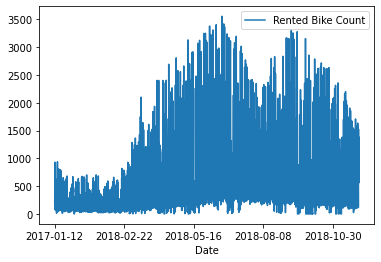

In [7]:
date = df.plot.line(x='Date',y='Rented Bike Count')
date.figure.savefig('Daily_total_rents.jpg')

 From the plot, we can roughly see that the highest
 amount of rents was between June 2018 and July 2018. We
 may  want to explore it further to see the link of
 rents with the season.

## Exploring the relationship between total rented bike count and seasons
Sum the 'Rented Bike Count' by 'Seasons' and plot the bar
chart in ascending order.

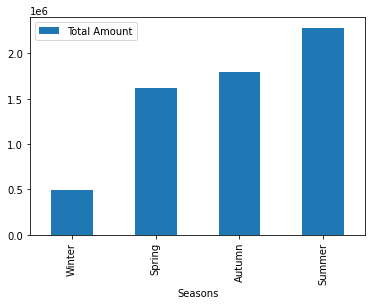

In [8]:

seasons = df.groupby('Seasons')['Rented Bike Count'].sum()\
    .reset_index(name ='Total Amount')
seasons.sort_values(["Total Amount"], ascending=(True),
                    inplace=True)
season = seasons.plot.bar(x = 'Seasons', y = 'Total '
                                              'Amount')
season.figure.savefig('Seasonal_total_rents.jpg')

The result was the same as we would expect, summer was the
season with the highest rent count while winter has the
lowest amount.

## Splitting Summer data

In [9]:
df_summer = df.loc[df['Seasons'] == 'Summer']
df_summer.reset_index(drop=True, inplace=True)
df_summer.head(1)

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day
0,2018-01-06,963,0,20.1,63,1.1,1698,0.0,0.0,0.0,Summer,Yes


In [10]:
df_summer.tail(1)

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day
2207,2018-08-31,1329,23,23.8,81,0.6,1893,0.0,0.0,0.0,Summer,Yes


From the head and tail of the summer dataframe, the
summer was from 2018-01-06 to 2018-08-31. The result was
also consistent with the daily rents plot at where the
highest amount happened.

## Exploring average bike count rented per hour

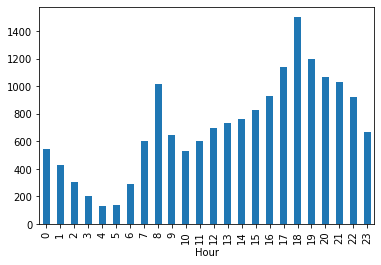

In [11]:
hour_rent = df.groupby('Hour').mean()['Rented Bike Count'].plot.bar()
hour_rent.figure.savefig('Hour_average.jpg')

## Split daytime and nighttime
To define whether the hour is daytime or night , we assumed
6:00 - 19:00 is daytime, and created a function to
determine the category.

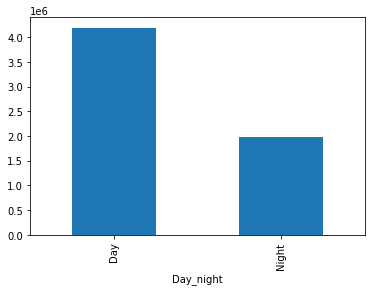

In [12]:
# Function to define the Day and Night
def day_or_night(rows):
    if rows['Hour'] >19 or rows['Hour']<6:
        val = 'Night'
    else:
        val = 'Day'
    return val
# Creat a new column in the dataframe
df['Day_night'] = df.apply(day_or_night, axis=1)
#Plot
day_night = df.groupby('Day_night').sum()['Rented Bike ' \
                                        'Count'].plot\
    .bar()
day_night.figure.savefig('Day_night_total_rents.jpg')

## Exploring relationship between rented bike count and temperature

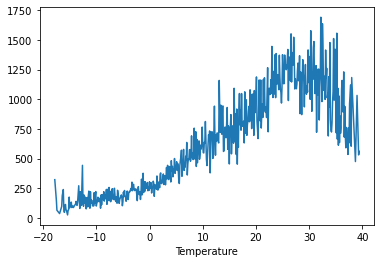

In [13]:
temp_rent = df.groupby('Temperature').mean()['Rented Bike' \
                                             ' Count'].plot()
temp_rent.figure.savefig('Temp_average.jpg')

## Exploring relationship between rented bike count and snowfall

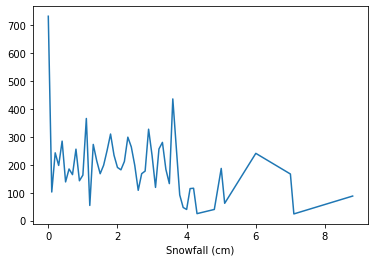

In [14]:
snow_rent = df.groupby('Snowfall (cm)').mean()['Rented ' \
                                              'Bike Count'].plot()
snow_rent.figure.savefig('Snow_average.jpg')

## Identify outliers

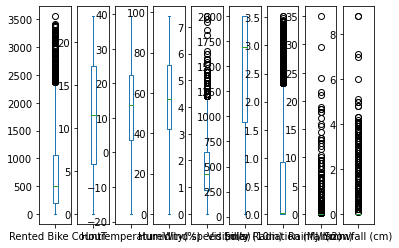

In [15]:
bp = df.plot.box(subplots=True)
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     8760 non-null   object 
 1   Rented Bike Count        8760 non-null   int64  
 2   Hour                     8760 non-null   int64  
 3   Temperature              8760 non-null   float64
 4   Humidity(%)              8760 non-null   int64  
 5   Wind speed (m/s)         8760 non-null   float64
 6   Visibility (10m)         8760 non-null   int64  
 7   Solar Radiation (MJ/m2)  8760 non-null   float64
 8   Rainfall(mm)             8760 non-null   float64
 9   Snowfall (cm)            8760 non-null   float64
 10  Seasons                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Day_night                8760 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 889.8+ KB


In [17]:
outlier_bike = df[df['Rented Bike Count']>2400]
outlier_bike['Hour'].unique()

array([18, 19, 17, 16, 20, 21,  8])

We can see the outliers in the bike count were due to the
high demand of bikes in rush hours and consistent with
the Hour_average.jpg plot, we decided not to remove those
 data.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     8760 non-null   object 
 1   Rented Bike Count        8760 non-null   int64  
 2   Hour                     8760 non-null   int64  
 3   Temperature              8760 non-null   float64
 4   Humidity(%)              8760 non-null   int64  
 5   Wind speed (m/s)         8760 non-null   float64
 6   Visibility (10m)         8760 non-null   int64  
 7   Solar Radiation (MJ/m2)  8760 non-null   float64
 8   Rainfall(mm)             8760 non-null   float64
 9   Snowfall (cm)            8760 non-null   float64
 10  Seasons                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Day_night                8760 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 889.8+ KB
